In [30]:
import pandas as pd
import seaborn as sns

In [31]:
dados = pd.read_csv('../data/flights_with_noise_5.csv')

In [32]:
dados

flight_id airline aircraft_type      schengen origin  arrival_time  \
0              2      NE    Boeing 787  non-schengen    FSD     11.412762   
1             30      RS  Embraer E175      schengen    KCE     18.726589   
2             15      RS    Boeing 737      schengen    KCE      9.454876   
3             25      RS  Embraer E175      schengen    DUY      8.301422   
4             11      RS    Boeing 737      schengen    GNM      9.199459   
...          ...     ...           ...           ...    ...           ...   
71170         29      RS    Boeing 737      schengen    KCE     19.426267   
71171         15      RS    Boeing 737      schengen    KCE      9.454876   
71172         10      RS    Boeing 737  non-schengen    FSD     10.186692   
71173         29      RS    Boeing 737      schengen    KCE     19.426267   
71174         17      RS   Airbus A320  non-schengen    KCE     16.736751   

       departure_time  day  year  is_holiday      delay  
0           15.412762    0  2010       False  48.221615  
1           23.726589    0  2010       False  43.561750  
2           13.454876    0  2010       False  77.921192  
3           11.301422    0  2010       False  72.095975  
4           11.199459    0  2010       False  77.272301  
...               ...  ...   ...         ...        ...  
71170       21.426267  364  2022       False  79.934614  
71171       13.454876  364  2022       False  74.829137  
71172       14.186692  364  2022       False  57.047851  
71173       21.426267  364  2022       False  80.988976  
71174       19.736751  364  2022       False  51.357118  

[71175 rows x 11 columns]

In [33]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71175 entries, 0 to 71174
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   flight_id       71175 non-null  int64  
 1   airline         71175 non-null  object 
 2   aircraft_type   71175 non-null  object 
 3   schengen        71175 non-null  object 
 4   origin          71175 non-null  object 
 5   arrival_time    71175 non-null  float64
 6   departure_time  71175 non-null  float64
 7   day             71175 non-null  int64  
 8   year            71175 non-null  int64  
 9   is_holiday      71175 non-null  bool   
 10  delay           71175 non-null  float64
dtypes: bool(1), float64(3), int64(3), object(4)
memory usage: 5.5+ MB


In [34]:
dados['delay']

0        48.221615
1        43.561750
2        77.921192
3        72.095975
4        77.272301
           ...    
71170    79.934614
71171    74.829137
71172    57.047851
71173    80.988976
71174    51.357118
Name: delay, Length: 71175, dtype: float64

In [35]:
from datetime import datetime, timedelta

In [36]:
def convert_day_to_date(day, year):
    base_date = datetime(year=year, month=1, day=1)
    target_date = base_date + timedelta(days=day)
    return target_date.strftime('%Y-%m-%d')  # Format the date as desired

# Convert 'day' column to regular dates
dados['date'] = dados.apply(lambda row: convert_day_to_date(row['day'], row['year']), axis=1)

In [37]:
dados

flight_id airline aircraft_type      schengen origin  arrival_time  \
0              2      NE    Boeing 787  non-schengen    FSD     11.412762   
1             30      RS  Embraer E175      schengen    KCE     18.726589   
2             15      RS    Boeing 737      schengen    KCE      9.454876   
3             25      RS  Embraer E175      schengen    DUY      8.301422   
4             11      RS    Boeing 737      schengen    GNM      9.199459   
...          ...     ...           ...           ...    ...           ...   
71170         29      RS    Boeing 737      schengen    KCE     19.426267   
71171         15      RS    Boeing 737      schengen    KCE      9.454876   
71172         10      RS    Boeing 737  non-schengen    FSD     10.186692   
71173         29      RS    Boeing 737      schengen    KCE     19.426267   
71174         17      RS   Airbus A320  non-schengen    KCE     16.736751   

       departure_time  day  year  is_holiday      delay        date  
0           15.412762    0  2010       False  48.221615  2010-01-01  
1           23.726589    0  2010       False  43.561750  2010-01-01  
2           13.454876    0  2010       False  77.921192  2010-01-01  
3           11.301422    0  2010       False  72.095975  2010-01-01  
4           11.199459    0  2010       False  77.272301  2010-01-01  
...               ...  ...   ...         ...        ...         ...  
71170       21.426267  364  2022       False  79.934614  2022-12-31  
71171       13.454876  364  2022       False  74.829137  2022-12-31  
71172       14.186692  364  2022       False  57.047851  2022-12-31  
71173       21.426267  364  2022       False  80.988976  2022-12-31  
71174       19.736751  364  2022       False  51.357118  2022-12-31  

[71175 rows x 12 columns]

In [38]:
import plotly.express as px

In [39]:
px.line(dados[dados['year']==2018], x = 'date', y = 'delay', color = 'airline')

In [40]:
px.histogram(dados, x = 'delay')

In [41]:
px.histogram(dados, x = 'delay', color = 'airline')

In [42]:
px.histogram(dados, x = 'delay', color = 'aircraft_type')

In [43]:
px.histogram(dados, x = 'delay', color = 'origin')

In [44]:
dados['delay'].mean()

48.99147281973866

In [45]:
dados['delay'].median()

47.76794068230904

In [46]:
dados['airline'].value_counts()

airline
RS    47533
ON    14197
NE     9445
Name: count, dtype: int64

In [47]:
dados.groupby('origin')['delay'].mean()

origin
CPA    40.057693
DUY    56.429556
EAR    52.240542
FSD    47.365346
GNM    47.496723
KCE    48.190568
SXZ    49.892971
VBY    32.050943
VNT    74.009610
Name: delay, dtype: float64

In [48]:
dados.groupby('aircraft_type')['delay'].mean()

aircraft_type
Airbus A320     47.766743
Boeing 737      59.498099
Boeing 777      40.057693
Boeing 787      38.372457
Embraer E175    37.046078
Name: delay, dtype: float64

In [49]:
dados.groupby('airline')['delay'].mean()

airline
NE    47.640537
ON    31.580871
RS    54.460051
Name: delay, dtype: float64

In [50]:
sns.__version__

'0.11.2'

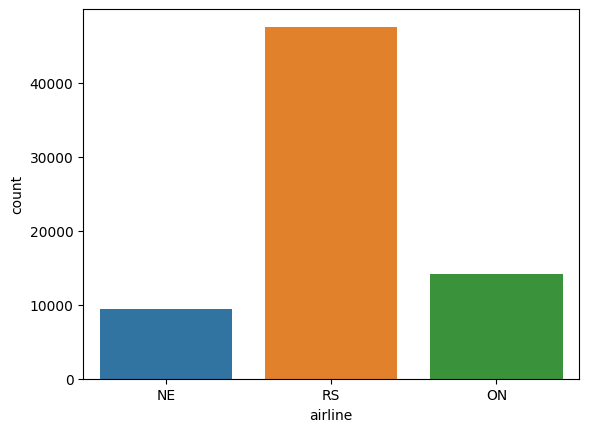

In [51]:
_ = sns.countplot(x=dados['airline'])

In [52]:
dados['aircraft_type'].value_counts()

aircraft_type
Boeing 737      31070
Embraer E175    16279
Airbus A320     12046
Boeing 787       7114
Boeing 777       4666
Name: count, dtype: int64

c:\Users\Igor\Documents\GitHub\data_flight_delays\.venv\Lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<Axes: xlabel='aircraft_type', ylabel='count'>

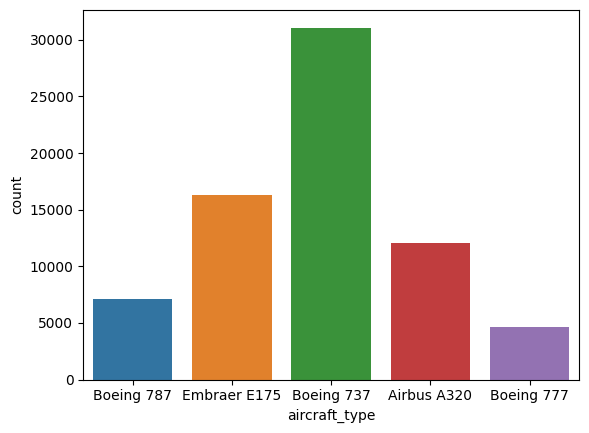

In [53]:
sns.countplot(dados['aircraft_type'])

In [54]:
dados['origin'].value_counts()

origin
KCE    16779
FSD    12073
EAR     7156
SXZ     7069
VBY     7038
DUY     6920
VNT     4792
GNM     4682
CPA     4666
Name: count, dtype: int64

c:\Users\Igor\Documents\GitHub\data_flight_delays\.venv\Lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<Axes: xlabel='origin', ylabel='count'>

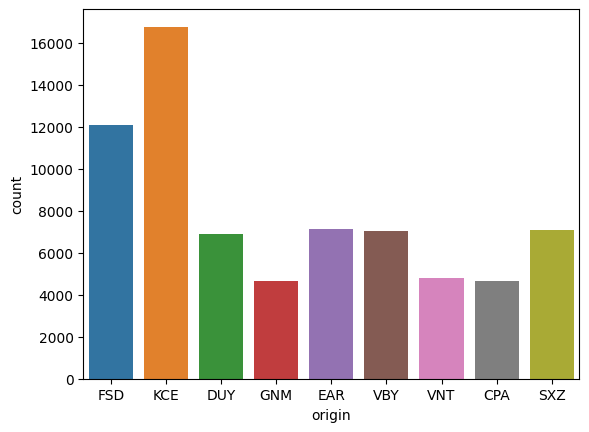

In [55]:
sns.countplot(dados['origin'])

In [56]:
dados['schengen'].value_counts(normalize= True)

schengen
schengen        0.728894
non-schengen    0.271106
Name: proportion, dtype: float64

c:\Users\Igor\Documents\GitHub\data_flight_delays\.venv\Lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<Axes: xlabel='schengen', ylabel='count'>

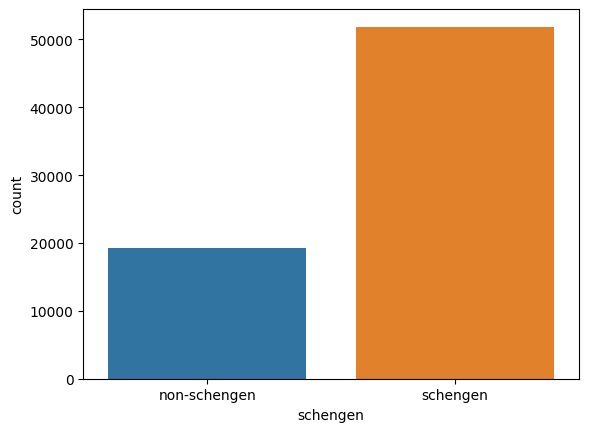

In [57]:
sns.countplot(dados['schengen'])

OptionError: No such keys(s): 'mode.use_inf_as_null'

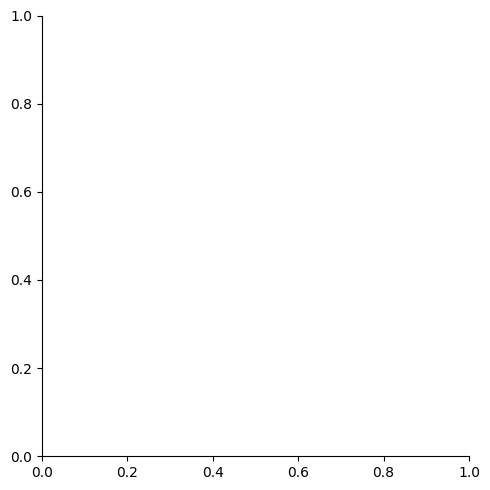

In [58]:
sns.displot(dados['delay'])

In [ ]:
sns.displot(dados['arrival_time'])

In [ ]:
sns.displot(dados['departure_time'])

In [ ]:
sns.boxplot(dados['delay'])

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

In [ ]:
categorical_vars = ['airline', 'aircraft_type', 'origin']

# Perform one-hot encoding
df_encoded_4 = pd.get_dummies(dados, columns=categorical_vars, dtype=int)

df_encoded_4['is_holiday'] = df_encoded_4['is_holiday'].map({False: 0, True: 1})
df_encoded_4['schengen'] = df_encoded_4['schengen'].map({'non-schengen': 0, 'schengen': 1})
df_encoded_4['is_weekend'] = df_encoded_4['day'].apply(lambda day: day % 7 == 0 or day % 7 == 6)

X = df_encoded_4.drop(['flight_id', 'day', 'year','departure_time', 'delay', 'date'], axis=1)
y = df_encoded_4['delay']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # random_state=42

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline

model = RandomForestRegressor()
rfe = RFE(model)
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)

mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

rmse = mean_squared_error(y_test, y_pred, squared=False)
print('Root Mean Squared Error:', rmse)

r2 = r2_score(y_test, y_pred)
print('R-squared:', r2)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)

mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

rmse = mean_squared_error(y_test, y_pred, squared=False)
print('Root Mean Squared Error:', rmse)

r2 = r2_score(y_test, y_pred)
print('R-squared:', r2)

In [ ]:
model_boosting = GradientBoostingRegressor()
model_boosting.fit(X_train, y_train)

y_pred = model_boosting.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)

mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

rmse = mean_squared_error(y_test, y_pred, squared=False)
print('Root Mean Squared Error:', rmse)

r2 = r2_score(y_test, y_pred)
print('R-squared:', r2)

In [ ]:
!python -m pip install statsmodels

In [ ]:
px.scatter(x = y_test, y = y_pred, trendline = 'ols', trendline_color_override = 'red',opacity = 0.2)

In [ ]:
px.scatter(x = y_pred, y = (y_pred - y_test), trendline = 'ols', trendline_color_override = 'red',opacity = 0.2)

In [ ]:
import seaborn as sns

In [ ]:
from scipy.stats import skewnorm
import numpy as np

In [ ]:
a = 5

In [ ]:
r = skewnorm.rvs(a, size=1000)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
fig, ax = plt.subplots(1, 1)
x = np.linspace(skewnorm.ppf(0.01, a),
                skewnorm.ppf(0.99, a), 100)
ax.plot(x, skewnorm.pdf(x, a),
       'r-', lw=5, alpha=0.6, label='skewnorm pdf')
ax.hist(r, density=True, bins='auto', histtype='stepfilled', alpha=0.2)
ax.set_xlim([x[0], x[-1]])
ax.legend(loc='best', frameon=False)
plt.show()